In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Change directory to the specified path
data_path = r'E:\Phd\Project_PAH\Data\SIRTA_long term_2015_Max Planck_complete_vf02.xlsx'
df = pd.read_excel(data_path, sheet_name='Database', skiprows=1)
#df = df.dropna()

df1 = pd.read_excel(data_path, sheet_name='Particulatephase_PAHs', skiprows=1)
df2 = pd.read_excel(data_path, sheet_name='p+g PAHs', skiprows=1)

# Convert the values in the first column to numeric and divide by 1000
data = pd.to_numeric(df.iloc[:, 1], errors='coerce').div(1000).values
ppah_sum = df1.iloc[:, 1:].apply(pd.to_numeric, errors='coerce').sum(axis=1).div(1000).values
pg_pah_sum = df2.iloc[:, 1:].apply(pd.to_numeric, errors='coerce').sum(axis=1).div(1000).values
ratio = ppah_sum / pg_pah_sum
print(ratio)
# Define edges for histogram bins
edges = np.arange(0, 101, 10)

# Use numpy.histogram to classify data into 10 groups
counts, bin_edges = np.histogram(data, bins=edges)

# Group data into a list based on discretized values
grouped_data = [df.iloc[(data >= edges[i]) & (data < edges[i+1])].index for i in range(len(edges)-1)]

# Create pairs of 'values' and 'ratio' for each group
value_ratio_pairs = [(pd.to_numeric(df.iloc[grouped_data[i], 1], errors='coerce').div(1000).values,
                      ratio[grouped_data[i]]) for i in range(len(grouped_data))]


for i, pair in enumerate(value_ratio_pairs):
    pm10_values = pair[0]  # PM10 values for the i-th group
    ratio_values = pair[1]  # Ratio values for the i-th group
    
    # Now you can work with pm10_values and ratio_values
    print(f"Group {i+1}:")
    print("PM10 values:", pm10_values)
    print("Ratio values:", ratio_values)
    print()


[0.02676895 0.03443969 0.03033842 0.03295427 0.01254175 0.04252972
 0.01940743 0.01519104 0.01756264 0.01750316        inf        inf
        inf        inf        inf 0.00761077 0.01804711 0.01964425
 0.0095994  0.02203053 0.03876548 0.02768524 0.01530515 0.01721129
 0.03161487 0.04158758 0.0657707  0.03569727 0.08568804 0.05141461
        inf        inf 0.03261018 0.01715053 0.0236019  0.02190953
 0.03576398 0.03347975 0.02202756 0.05994608 0.01607552 0.01289254
 0.02276907 0.03363037 0.02126092 0.02094174 0.05054005 0.02460252
 0.05328506 0.02982255 0.02976511 0.03152389 0.02088354 0.02184556
 0.03008535 0.01004785 0.03409957 0.01112131 0.00833788 0.01143905
 0.02178186 0.03321439 0.05879353 0.07519066 0.01554718 0.01328883
 0.01846201 0.00717687 0.01319075 0.00758715 0.01010894 0.01325035
 0.01313448 0.01454211 0.02226645 0.01592151 0.01845613 0.01736234
 0.03491728 0.00908274 0.01044504 0.01041849        inf        inf
        inf        inf 0.03455008 0.00709337 0.01055614 0.0314

C:\Users\Admin\AppData\Local\Temp\ipykernel_61356\2976761392.py:18: RuntimeWarning: divide by zero encountered in divide
  ratio = ppah_sum / pg_pah_sum


In [2]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Extract temperature values from the DataFrame
temperature_values = df.iloc[:, 65].values  # Assuming temperature is at column index 65

# Create pairs of 'PM10', 'ratio', and 'temperature' for each group
data_pairs = [(pd.to_numeric(df.iloc[grouped_data[i], 1], errors='coerce').div(1000).values,
               ratio[grouped_data[i]],
               temperature_values[grouped_data[i]]) for i in range(len(grouped_data))]

# Create a grid of correlation plots
num_groups = len(grouped_data)
num_columns = 3  # Number of columns for PM10, ratio, and temperature
num_rows = (num_groups + num_columns - 1) // num_columns

# Set up the subplots

# Flatten the axes array for easier iteration

# Iterate through the pairs and create correlation plots


C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)
C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)
C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.P

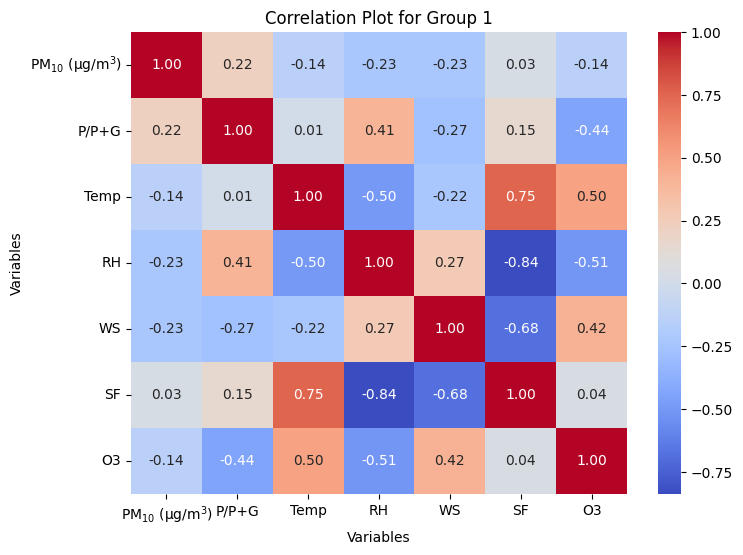

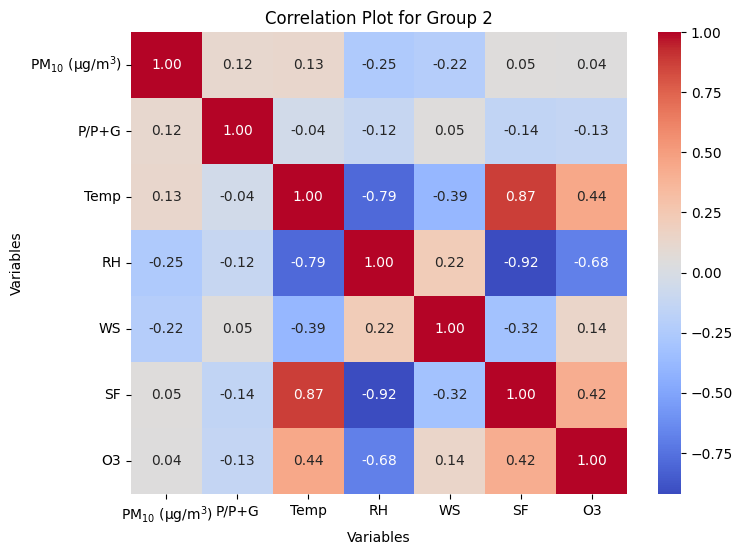

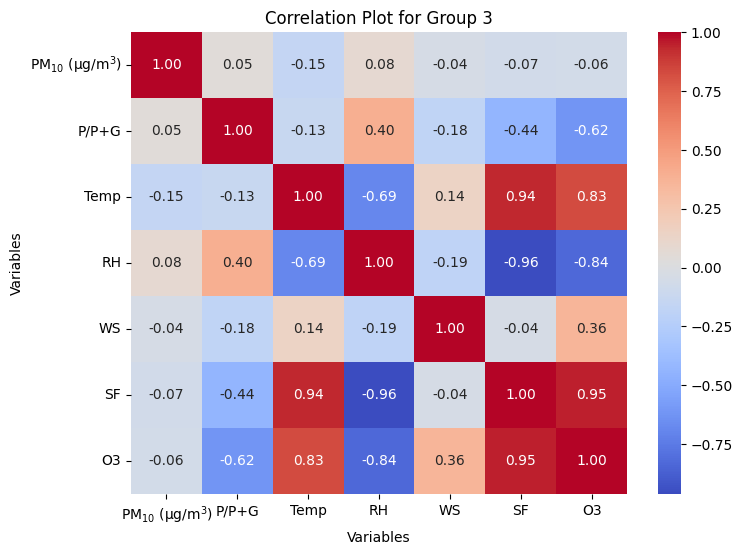

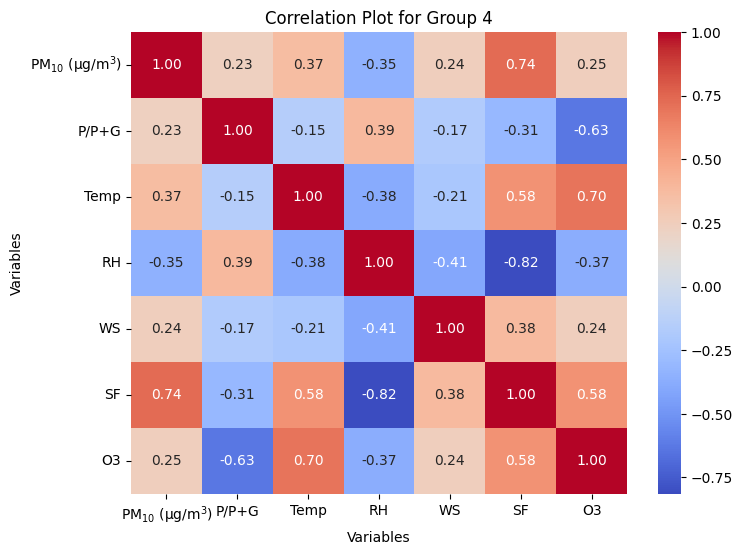

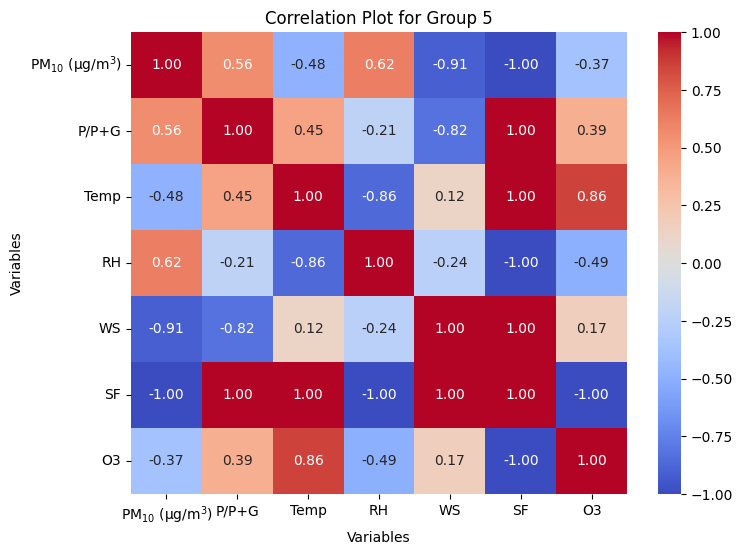

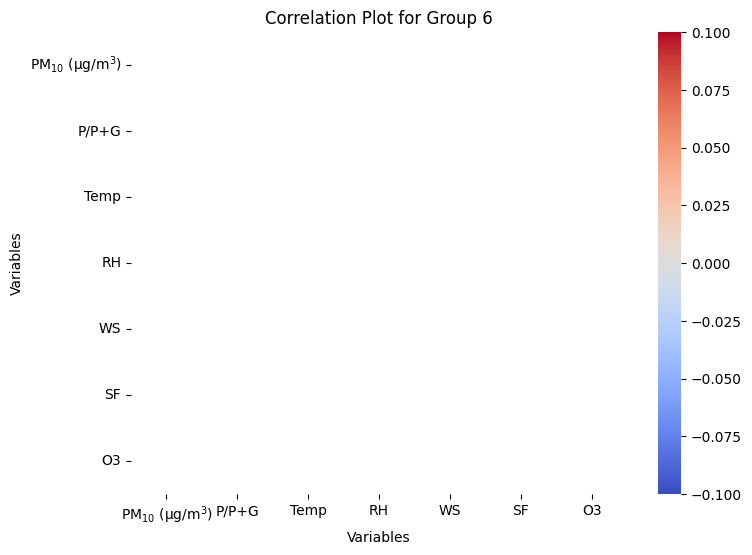

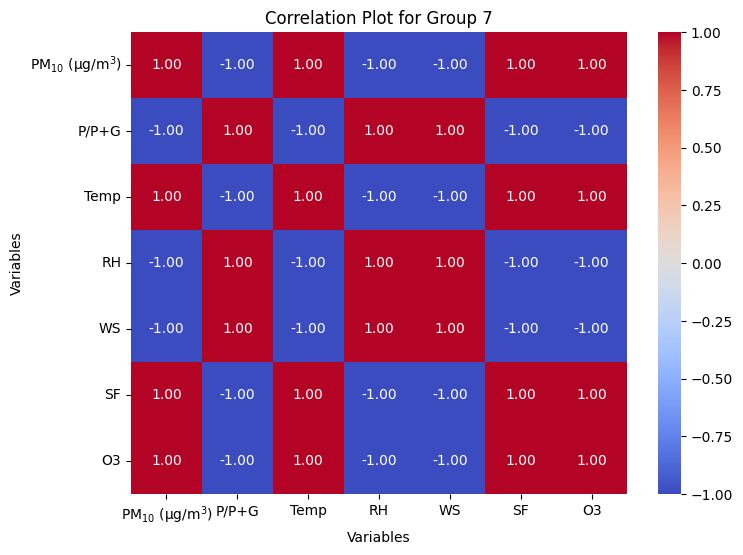

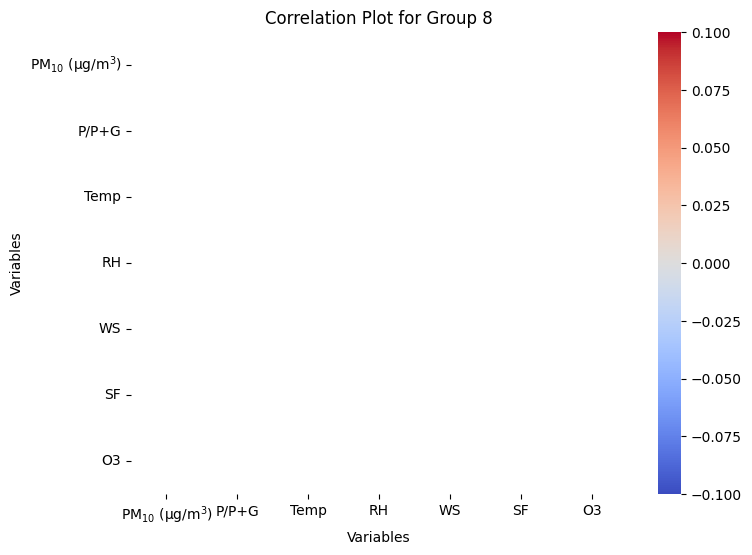

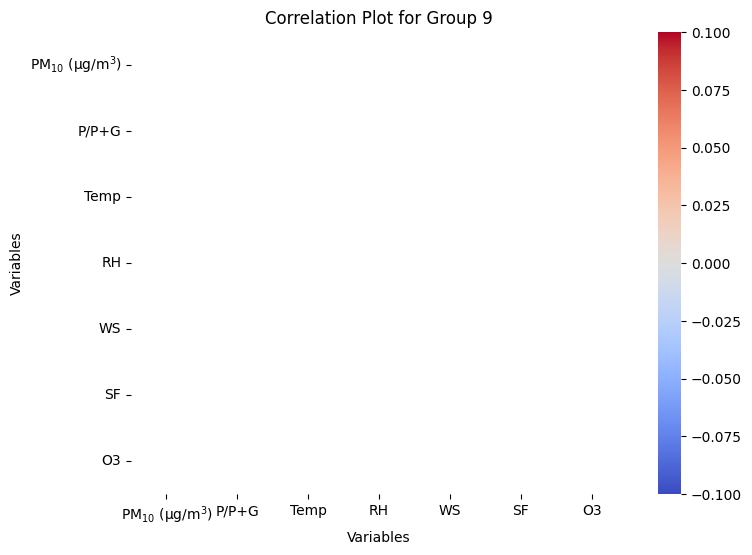

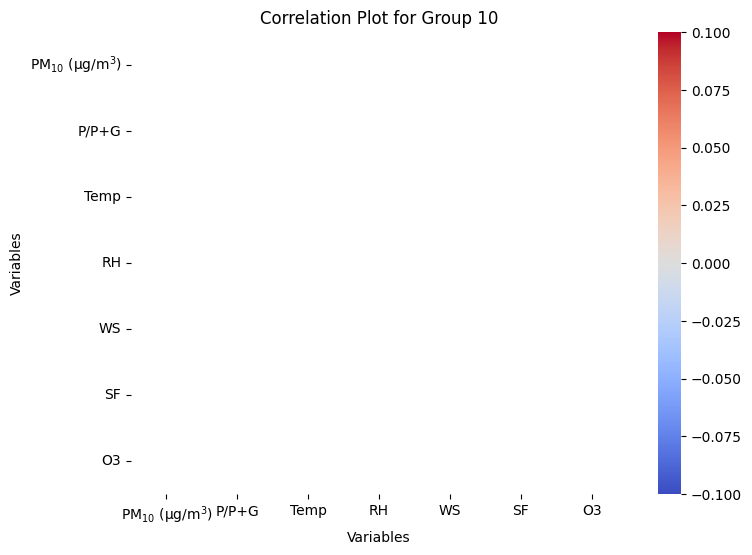

In [4]:


import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Extract temperature, RH, WS, SF, and O3 values from the DataFrame
temperature_values = df.iloc[:, 65].values  # Assuming temperature is at column index 65
rh_values = df.iloc[:, 64].values  # Assuming relative humidity is at column index 64
ws_values = df.iloc[:, 66].values  # Assuming wind speed is at column index 66
sf_values = df.iloc[:, 68].values  # Assuming solar flux is at column index 68
o3_values = df.iloc[:, 63].values  # Assuming O3 is at column index 63

# Create pairs of 'PM10', 'ratio', 'temperature', 'RH', 'WS', 'SF', and 'O3' for each group
data_pairs = [(pd.to_numeric(df.iloc[grouped_data[i], 1], errors='coerce').div(1000).values,
               ratio[grouped_data[i]],
               temperature_values[grouped_data[i]],
               rh_values[grouped_data[i]],
               ws_values[grouped_data[i]],
               sf_values[grouped_data[i]],
               o3_values[grouped_data[i]]) for i in range(len(grouped_data))]

# Iterate through the pairs and create correlation plots for each group in a separate figure
for i, (pm10_values, ratio_values, temperature_values, rh_values, ws_values, sf_values, o3_values) in enumerate(data_pairs):
    # Create a new figure
    plt.figure(figsize=(8, 6))
    
    # Create a DataFrame with the data
    df_corr = pd.DataFrame({'PM$_{10}$ (µg/m$^3$)': pm10_values,
                            'P/P+G': ratio_values,
                            'Temp': temperature_values,
                            'RH': rh_values,
                            'WS': ws_values,
                            'SF': sf_values,
                            'O3': o3_values})
    # Create the correlation plot
    
    sns.heatmap(df_corr.corr(), annot=True, cmap='coolwarm', fmt='.2f')
    plt.title(f'Correlation Plot for Group {i+1}')
    plt.xlabel('Variables')
    plt.ylabel('Variables')
    plt.savefig(f'Plots/correlation_plot_group_{i+1}.png')

    # # Show the plot
    # plt.show()